# Project report: Affects of weather phenomenas on renewable energy production

This project aims to investigate the impact of climate on a power grid that relies more and more on wind/solar energy, as is the case in Germany.

The project is divided into 3 parts:
1. Data collection
2. Data analysis
3. Data visualization

The data used in this project is available on the [Open Power System Data](https://open-power-system-data.org/) website.

TODO ALOT!!!

## Install dependencies

In [55]:
%%capture

%pip install "SQLAlchemy==1.4.46"
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

## Load & process data
First we need to load the data from the database and process it so that it can be used for analysis and visualization.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATABASE_FILE: str = "sqlite:///../data/processed_data/transformed_data.sqlite"

In [17]:
#
# Power data
#

power_df = pd.read_sql_table("power_data", DATABASE_FILE)

# Remove hours and minutes from the column as we are only interested in the date
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Temperature data
#

temperature_df = pd.read_sql_table("temperature_data", DATABASE_FILE)

# Replace illegal values with NA
temperature_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from the column as we are only interested in the date
temperature_df["date"] = temperature_df["date"].dt.date

# Group by date and calculate the average temperature in Germany
temperature_df = temperature_df.groupby("date")[["temperature", "humidity"]].mean().reset_index()

#
# Rain data
#

rain_df = pd.read_sql_table("rain_data", DATABASE_FILE)

# Replace illegal values with NA
rain_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
rain_df["date"] = rain_df["date"].dt.date

# Remove bad data
drop_codes = {
    4: pd.NA,  # Form of precipitation not known, although precipitation reported
    9: pd.NA,  # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["rain_form"] = rain_df["rain_form"].replace(drop_codes)

# Aggregate data
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

aggregations = {
    "rain": "mean",
    "rain_form": mode_without_zero,
    "snow_height": "mean",
    "new_snow_height": "mean",
}

# Group by date and calculate the average precipitation
rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

#
# Cloud data
#

cloud_df = pd.read_sql_table("cloud_data", DATABASE_FILE)

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

#
# Wind data
#

wind_df = pd.read_sql_table("wind_data", DATABASE_FILE)

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data as we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

## Questions to answer

### Question 1. Is there a correlation between weather conditions and renewable energy production, and if so, is it linear or exponential?

To answer this initial question, I will use a scatter plot to visualize the correlation between the two variables.
The first variable is the amount of energy produced by renewable sources, and the second is the weather condition.
A scatter plot can easily show us if there is a correlation between the two variables, and if so, what kind of correlation it is.

#### Temperature

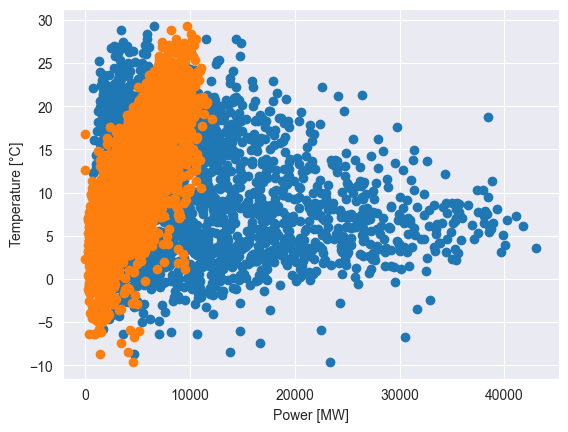

In [18]:
# Drop bad entries
local_power_df = power_df[power_df["cet_cest_timestamp"].isin(temperature_df["date"])]
local_temperature_df = temperature_df[temperature_df["date"].isin(local_power_df["cet_cest_timestamp"])]

# Plot
plt.scatter(local_power_df["DE_wind_generation_actual"], local_temperature_df["temperature"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_temperature_df["temperature"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Temperature [°C]")
plt.grid(True)
plt.show()

TODO: say what we can see (analysis)

#### Precipitation

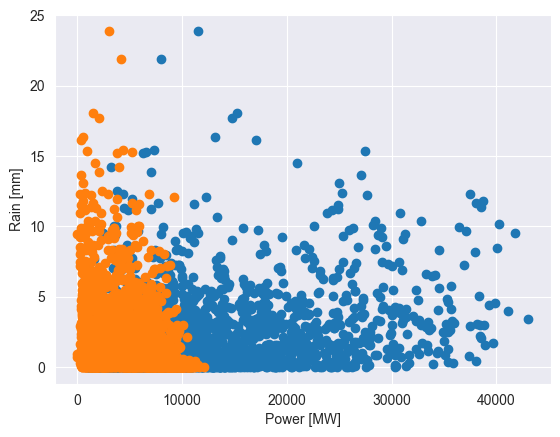

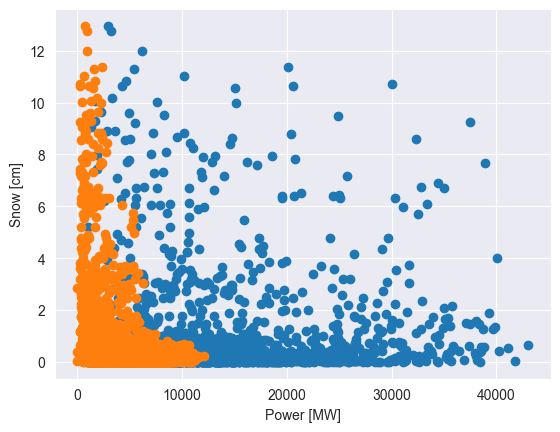

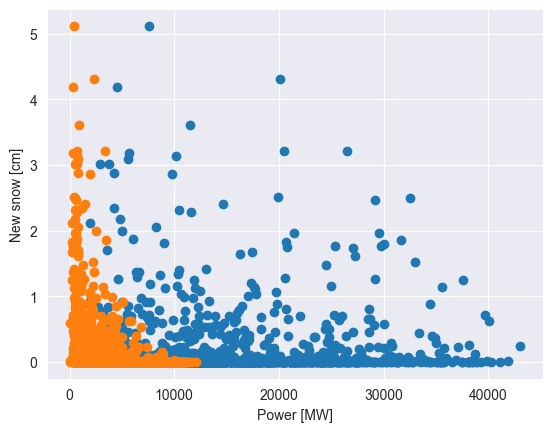

In [19]:
# Drop bad entries
local_power_df = power_df[power_df["cet_cest_timestamp"].isin(rain_df["date"])]
local_rain_df = rain_df[rain_df["date"].isin(local_power_df["cet_cest_timestamp"])]

# Plot
plt.scatter(local_power_df["DE_wind_generation_actual"], local_rain_df["rain"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_rain_df["rain"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Rain [mm]")
plt.grid(True)
plt.show()

plt.scatter(local_power_df["DE_wind_generation_actual"], local_rain_df["snow_height"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_rain_df["snow_height"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Snow [cm]")
plt.grid(True)
plt.show()

plt.scatter(local_power_df["DE_wind_generation_actual"], local_rain_df["new_snow_height"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_rain_df["new_snow_height"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("New snow [cm]")
plt.grid(True)
plt.show()

TODO: say what we can see (analysis)

#### Cloud coverage

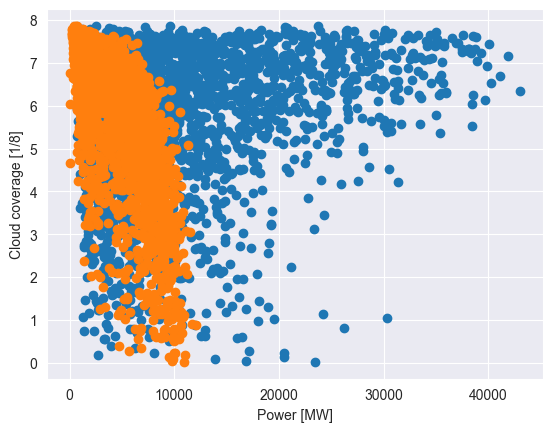

In [20]:
# Drop bad entries
local_power_df = power_df[power_df["cet_cest_timestamp"].isin(cloud_df["date"])]
local_cloud_df = cloud_df[cloud_df["date"].isin(local_power_df["cet_cest_timestamp"])]

# Plot
plt.scatter(local_power_df["DE_wind_generation_actual"], local_cloud_df["cloud_cover"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_cloud_df["cloud_cover"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Cloud coverage [1/8]")
plt.grid(True)
plt.show()

Todo: asdf

#### Wind speed

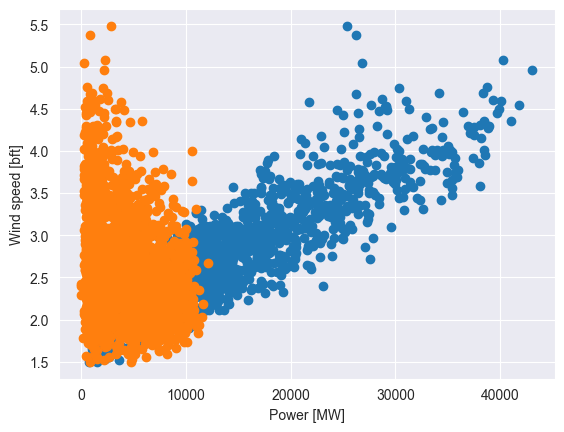

In [21]:
# Drop bad entries
local_power_df = power_df[power_df["cet_cest_timestamp"].isin(wind_df["date"])]
local_wind_df = wind_df[wind_df["date"].isin(local_power_df["cet_cest_timestamp"])]

# Plot
plt.scatter(local_power_df["DE_wind_generation_actual"], local_wind_df["speed"], label="Wind")
plt.scatter(local_power_df["DE_solar_generation_actual"], local_wind_df["speed"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Wind speed [bft]")

# # Linear regression
# x = local_power_df["DE_wind_generation_actual"]
# y = local_wind_df["speed"]
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b, color="red", label="Linear regression")

plt.grid(True)
plt.show()

TODO: asdf

#### Interesting findings
Cloud coverage and wind speed seem to have a linear correlation. One could say one follows the other.

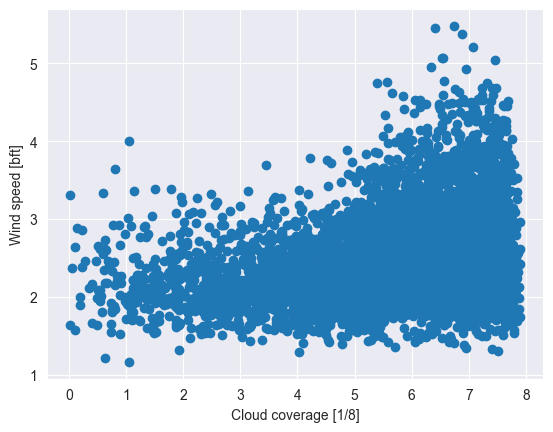

In [22]:
# Drop bad entries
cloud_df = cloud_df[cloud_df["date"].isin(wind_df["date"])]
wind_df = wind_df[wind_df["date"].isin(cloud_df["date"])]

# Plot
plt.scatter(cloud_df["cloud_cover"], wind_df["speed"])
plt.xlabel("Cloud coverage [1/8]")
plt.ylabel("Wind speed [bft]")
plt.grid(True)
plt.show()

todo: smart stuff here

### Question 2. How reliable are renewable energy sources? Do extreme weather conditions affect grid stability?
alsdflajsdf

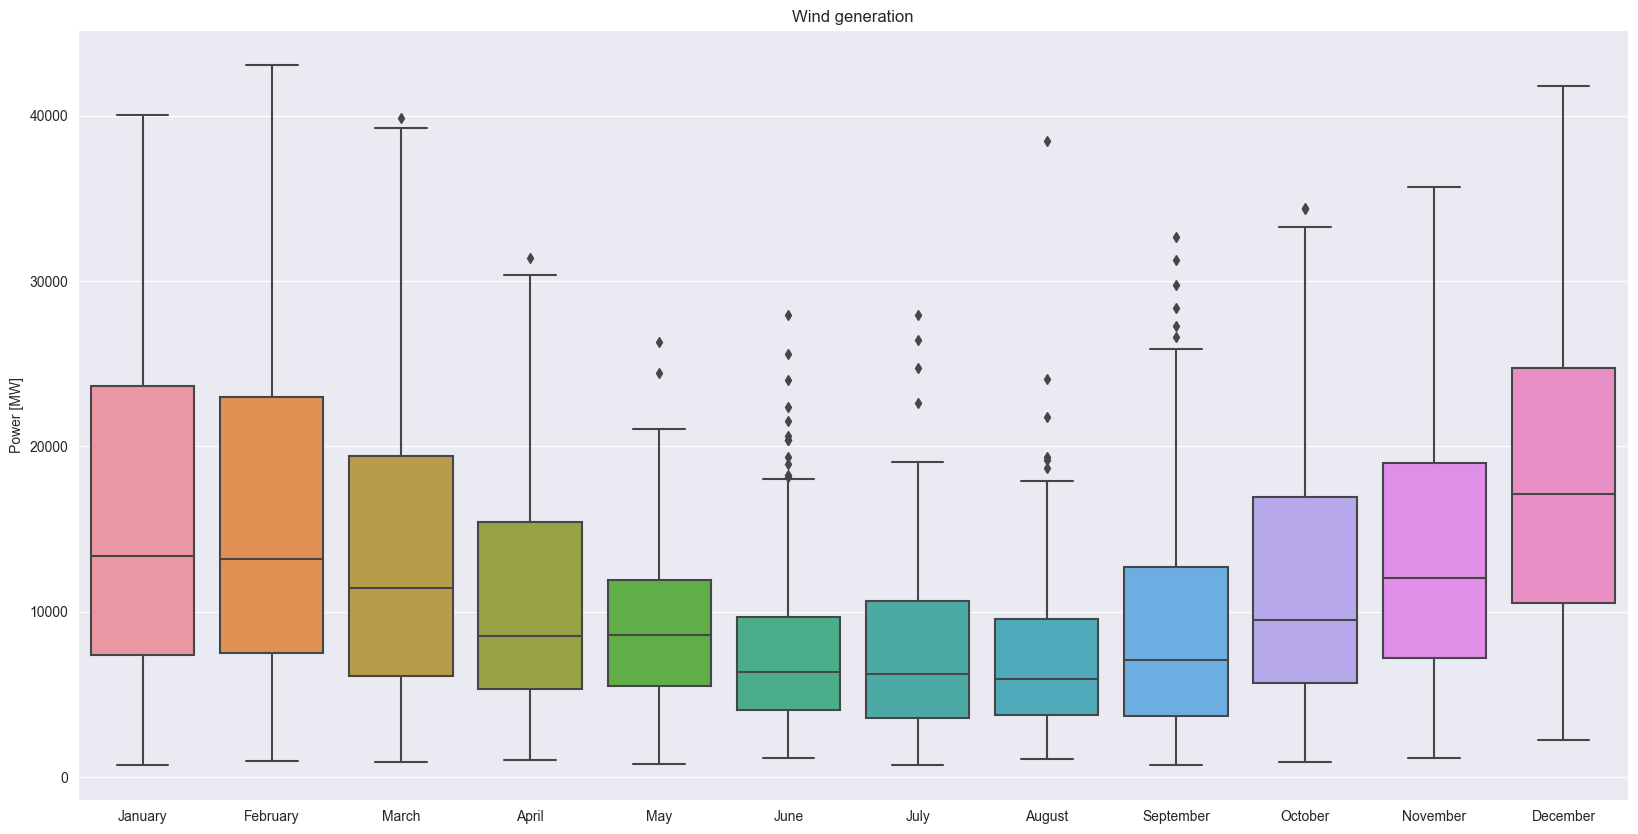

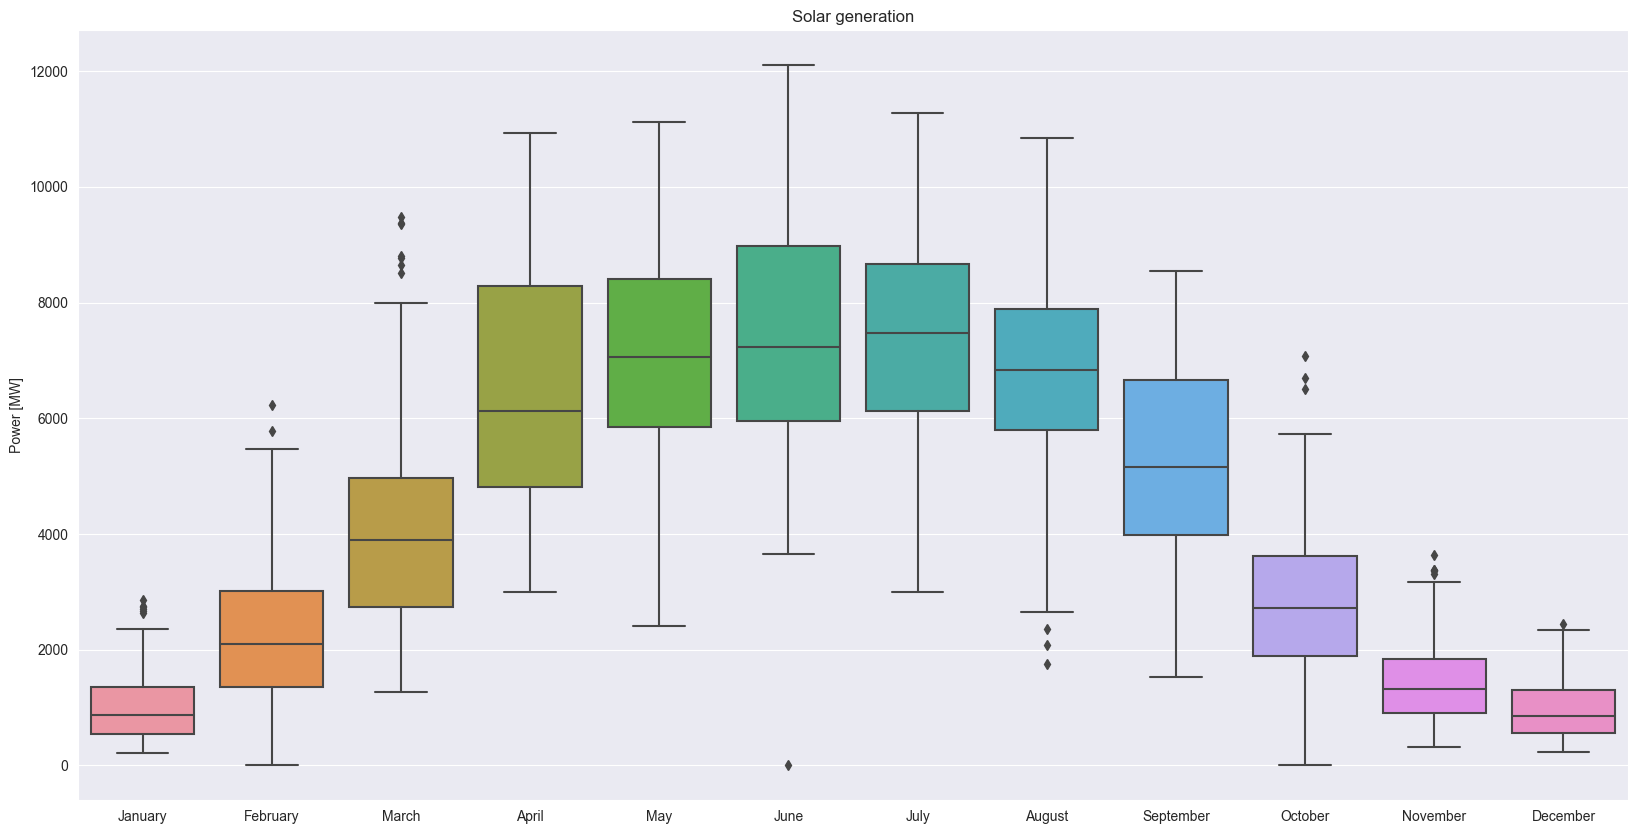

In [23]:
# Make local copies of the dataframes
local_power_df = power_df.copy()

# Convert the "cet_cest_timestamp" column to datetime if it's not already
power_df["cet_cest_timestamp"] = pd.to_datetime(power_df["cet_cest_timestamp"])

# Month mapping
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

month_dataframes = []

# Split the dataframe into months
for month in range(1, 13):
    month_dataframes.append(power_df[power_df["cet_cest_timestamp"].dt.month == month])

# Plot
plt.figure(figsize=(20, 10))
the_plot = sns.boxplot(data=[month_dataframes[0]["DE_wind_generation_actual"],
                             month_dataframes[1]["DE_wind_generation_actual"],
                             month_dataframes[2]["DE_wind_generation_actual"],
                             month_dataframes[3]["DE_wind_generation_actual"],
                             month_dataframes[4]["DE_wind_generation_actual"],
                             month_dataframes[5]["DE_wind_generation_actual"],
                             month_dataframes[6]["DE_wind_generation_actual"],
                             month_dataframes[7]["DE_wind_generation_actual"],
                             month_dataframes[8]["DE_wind_generation_actual"],
                             month_dataframes[9]["DE_wind_generation_actual"],
                             month_dataframes[10]["DE_wind_generation_actual"],
                             month_dataframes[11]["DE_wind_generation_actual"]])
the_plot.set_xticklabels(months)
plt.title("Wind generation")
plt.ylabel("Power [MW]")
plt.show()

plt.figure(figsize=(20, 10))
the_plot = sns.boxplot(data=[month_dataframes[0]["DE_solar_generation_actual"],
                             month_dataframes[1]["DE_solar_generation_actual"],
                             month_dataframes[2]["DE_solar_generation_actual"],
                             month_dataframes[3]["DE_solar_generation_actual"],
                             month_dataframes[4]["DE_solar_generation_actual"],
                             month_dataframes[5]["DE_solar_generation_actual"],
                             month_dataframes[6]["DE_solar_generation_actual"],
                             month_dataframes[7]["DE_solar_generation_actual"],
                             month_dataframes[8]["DE_solar_generation_actual"],
                             month_dataframes[9]["DE_solar_generation_actual"],
                             month_dataframes[10]["DE_solar_generation_actual"],
                             month_dataframes[11]["DE_solar_generation_actual"]])
the_plot.set_xticklabels(months)
plt.title("Solar generation")
plt.ylabel("Power [MW]")
plt.show()

Wow very nice inverse curve maybe this can mean something about stability and reliability

To answer this question, we will pick the date with the lowest solar generation and see if there is enough wind blah blah..

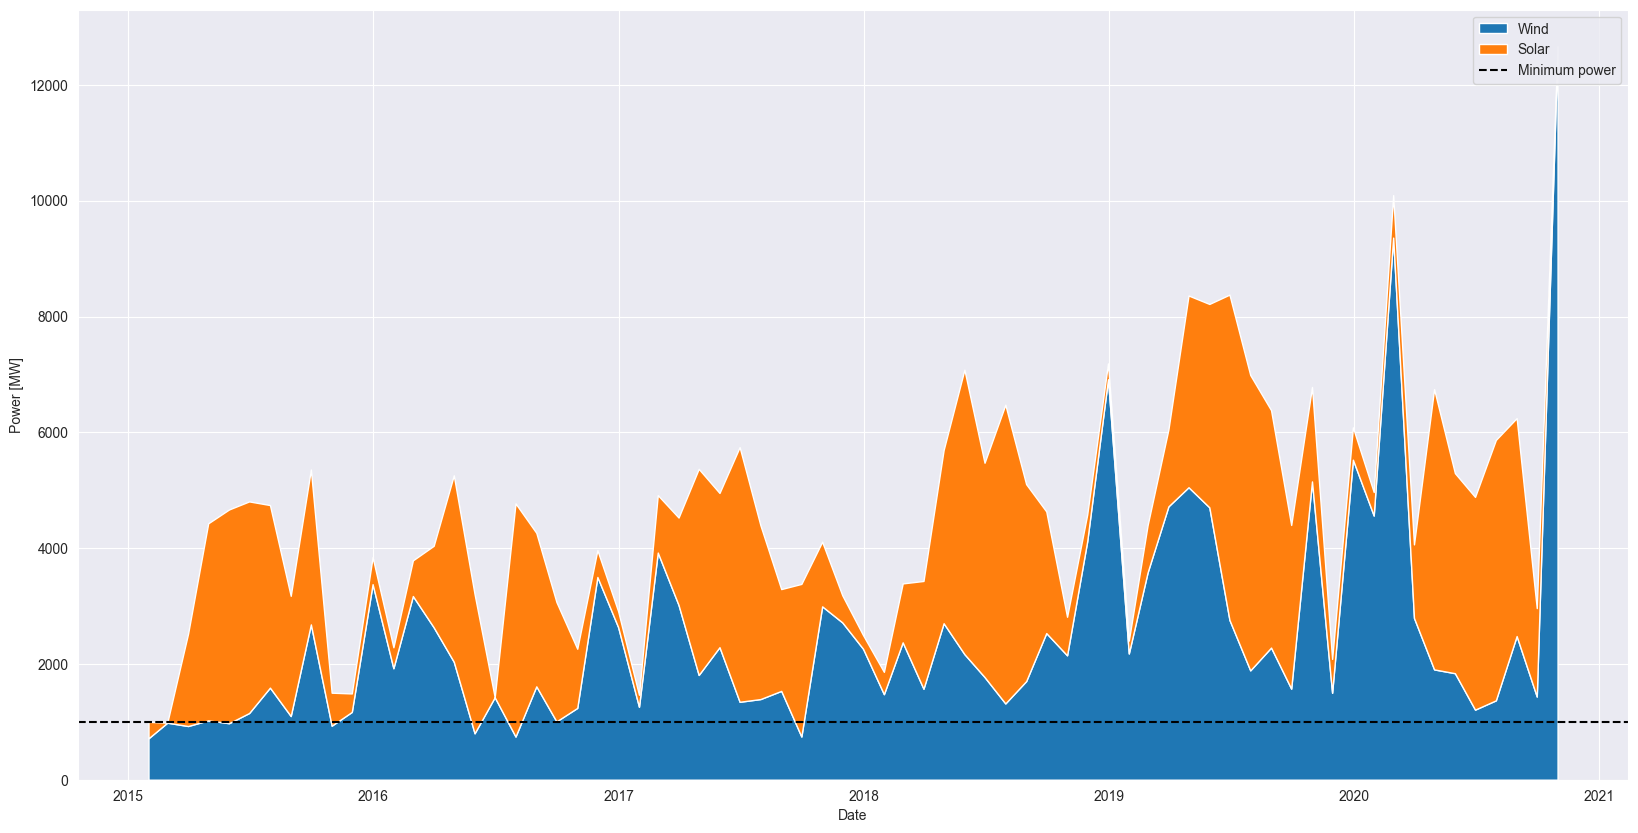

Minimum power: 999.7916666666666 MW
Date: 2015-01-31 00:00:00


In [24]:
# Make local copies of the dataframes
local_power_df = power_df.copy()

# Convert the "cet_cest_timestamp" column to a datetime object if it's not already
local_power_df["cet_cest_timestamp"] = pd.to_datetime(local_power_df["cet_cest_timestamp"])

# We want to group the data by month and aggregate the minimum value per month for wind and solar
min_wind_df = local_power_df.groupby(pd.Grouper(key="cet_cest_timestamp", freq="M"))["DE_wind_generation_actual"].min()
min_solar_df = local_power_df.groupby(pd.Grouper(key="cet_cest_timestamp", freq="M"))["DE_solar_generation_actual"].min()

# Plot a stacked area chart with solar and wind power
plt.figure(figsize=(20, 10))
plt.stackplot(min_wind_df.index, min_wind_df, min_solar_df, labels=["Wind", "Solar"])
plt.xlabel("Date")
plt.ylabel("Power [MW]")

# Create a horizontal line for the minimum power (sum of solar and wind) and include the value in the legend
min_power = min_wind_df + min_solar_df
plt.axhline(min_power[0], color="black", linestyle="--", label="Minimum power")

# Include a legend
plt.legend()
plt.show()

# Print the minimum power and the date it occurred
print("Minimum power: {} MW".format(min_power[0]))
print("Date: {}".format(min_power.index[0]))

TODO: say what we can see (analysis) internet reseach for date

#### Orkan Sabine

Wind power: 34538.041666666664 MW
Solar power: 3328.6666666666665 MW
Total power: 37866.70833333333 MW


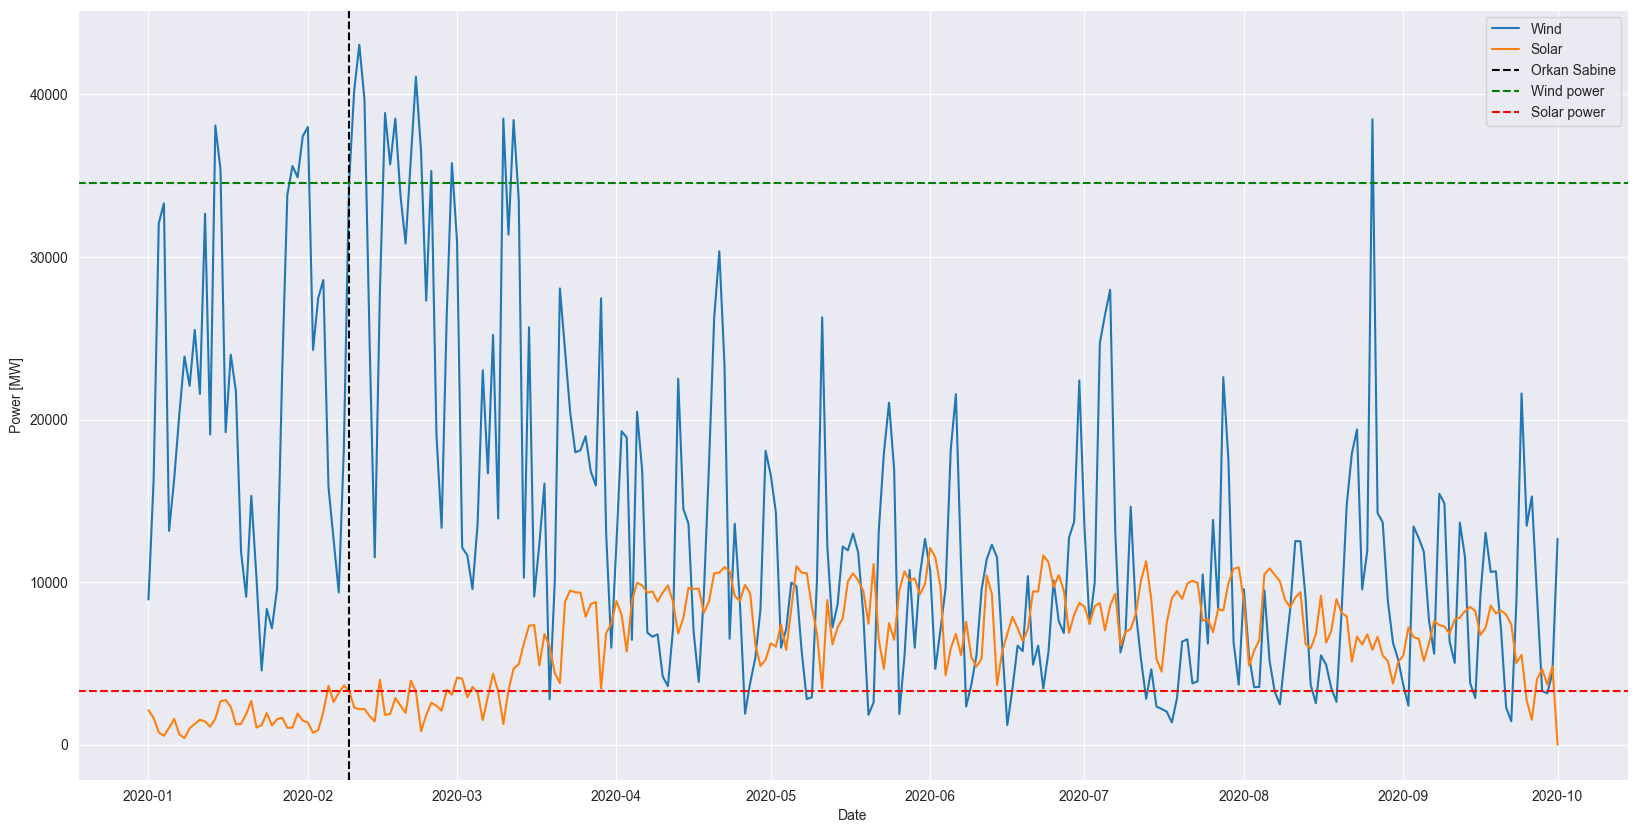

In [25]:
# Make local copies of the dataframes
local_power_df = power_df.copy()

# Prepare dataframe
orkan_sabine_date = pd.Timestamp(2020, 2, 9).date()

# Convert the "cet_cest_timestamp" column to a datetime object if it's not already
local_power_df["cet_cest_timestamp"] = pd.to_datetime(local_power_df["cet_cest_timestamp"])

# Print the power on the day of the storm for wind and solar
wind_power = local_power_df[local_power_df["cet_cest_timestamp"].dt.date == orkan_sabine_date]["DE_wind_generation_actual"].sum()
solar_power = local_power_df[local_power_df["cet_cest_timestamp"].dt.date == orkan_sabine_date]["DE_solar_generation_actual"].sum()
print("Wind power: {} MW".format(wind_power))
print("Solar power: {} MW".format(solar_power))

# Print the sum of both
print("Total power: {} MW".format(wind_power + solar_power))

# Graph visualisation of 2020 data with the storm
plt.figure(figsize=(20, 10))
plt.plot(local_power_df[local_power_df["cet_cest_timestamp"].dt.year == 2020]["cet_cest_timestamp"], local_power_df[local_power_df["cet_cest_timestamp"].dt.year == 2020]["DE_wind_generation_actual"], label="Wind")
plt.plot(local_power_df[local_power_df["cet_cest_timestamp"].dt.year == 2020]["cet_cest_timestamp"], local_power_df[local_power_df["cet_cest_timestamp"].dt.year == 2020]["DE_solar_generation_actual"], label="Solar")
plt.xlabel("Date")
plt.ylabel("Power [MW]")

# Create a vertical line for the storm
plt.axvline(orkan_sabine_date, color="black", linestyle="--", label="Orkan Sabine")

# Create a horizontal line for the power on the day of the storm
plt.axhline(local_power_df[local_power_df["cet_cest_timestamp"].dt.date == orkan_sabine_date]["DE_wind_generation_actual"].sum(), color="green", linestyle="--", label="Wind power")
plt.axhline(local_power_df[local_power_df["cet_cest_timestamp"].dt.date == orkan_sabine_date]["DE_solar_generation_actual"].sum(), color="red", linestyle="--", label="Solar power")

# Include a legend
plt.legend()
plt.show()

huge amounts of wind energy, good day for germany

### Question 3. What is the potential for energy storage during peak production periods?

Energy storage is a very important topic in the energy sector. It allows us to store energy when it is produced and use it when it is needed. This is especially important for renewable energy sources, as they are not always available. For example, solar energy is only available during the day and wind energy is only available when it is windy. If we could store the energy produced during the day and use it at night, we would not need to rely on other energy sources such as coal or nuclear power. As current energy storage solutions aren't capable of storing large amounts of energy, we will focus on the potential for energy storage during peak production periods. Trend analysis and forecasting is used by grid providers to predict the amount of energy that will be produced in the future. This allows them to plan ahead and make sure that there is enough energy available for everyone. This is useful activating fossile power plants prematurely as these have a delayed response time compared to renewable energy sources. blah blah

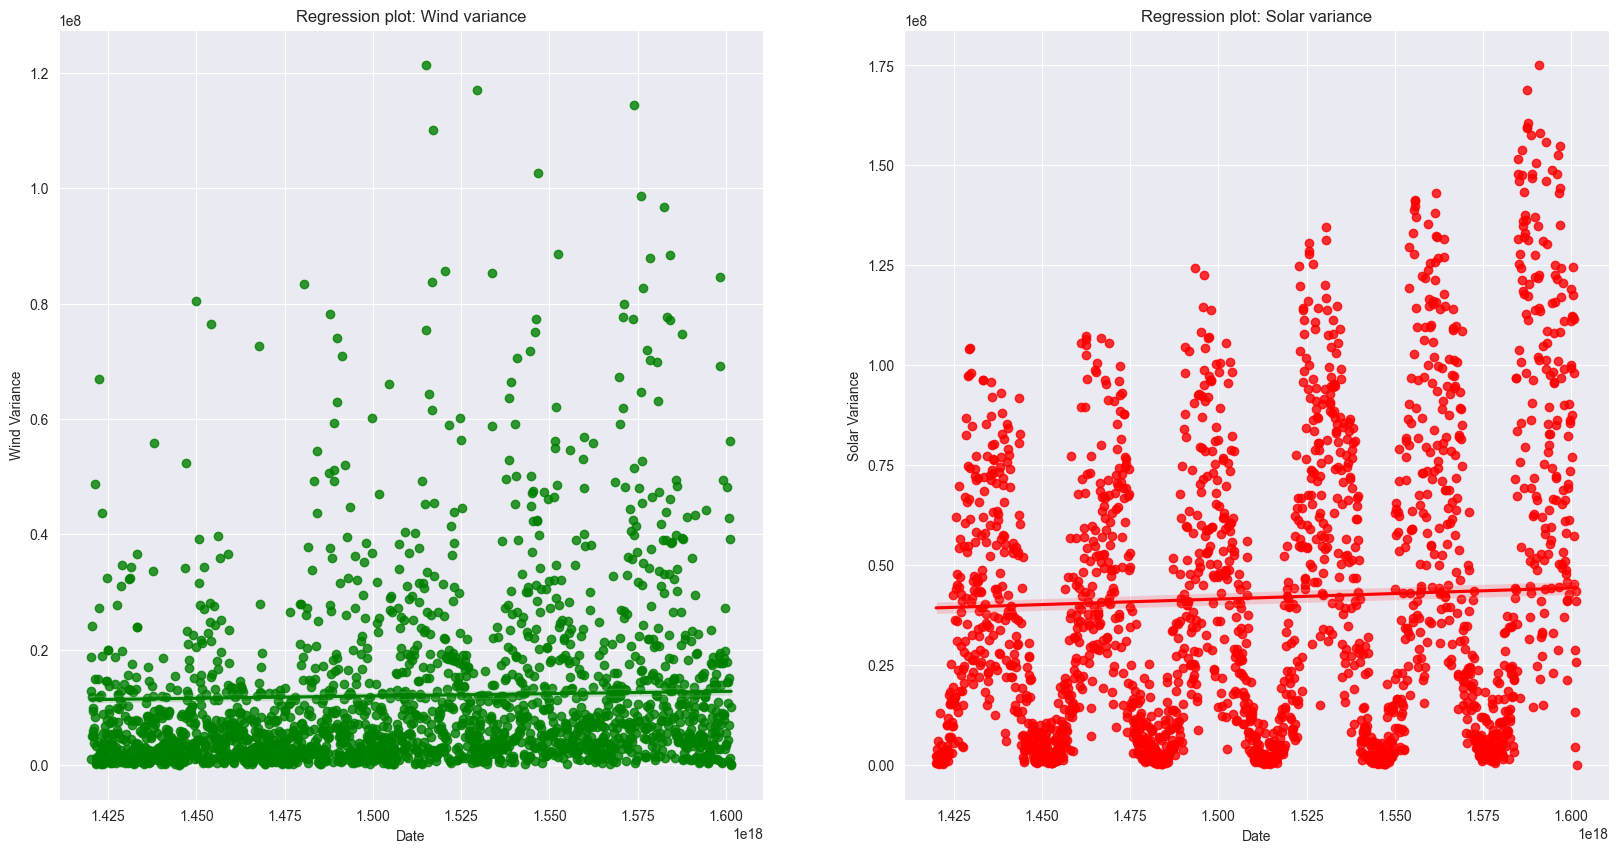

In [26]:
# We want to analyse the intra-day power generation variance for wind and solar. A high variance means that the power generation is not stable and that there is a lot of potential for energy storage.
intra_power_df = pd.read_sql_table("power_data", DATABASE_FILE)
intra_power_df["cet_cest_timestamp"] = pd.to_datetime(intra_power_df["cet_cest_timestamp"])
intra_power_df.set_index("cet_cest_timestamp", inplace=True)

# Calculate the variance for wind and solar generation
wind_variance = intra_power_df["DE_wind_generation_actual"].resample("D").var()
solar_variance = intra_power_df["DE_solar_generation_actual"].resample("D").var()

# Convert the datetime objects to numeric values (timestamp as int64) for regression analysis
wind_timeframe = wind_variance.index.astype(np.int64)
solar_timeframe = solar_variance.index.astype(np.int64)

# Combine time and wind variance into a dataframe and time and solar variance into another dataframe
wind_time_variance_df = pd.DataFrame({"Date": wind_timeframe, "Wind Variance": wind_variance.values})
solar_time_variance_df = pd.DataFrame({"Date": solar_timeframe, "Solar Variance": solar_variance.values})

# Plot two regression plots for wind and solar variance
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.regplot(x="Date", y="Wind Variance", data=wind_time_variance_df, color="green")
plt.title("Regression plot: Wind variance")
# todo: convert numeric values back to dates for x-axis

plt.subplot(1, 2, 2)
sns.regplot(x="Date", y="Solar Variance", data=solar_time_variance_df, color="red")
plt.title("Regression plot: Solar variance")
# todo: convert numeric values back to dates for x-axis

plt.show()

### Question 4. What is the trend for renewable energy generation in Germany?

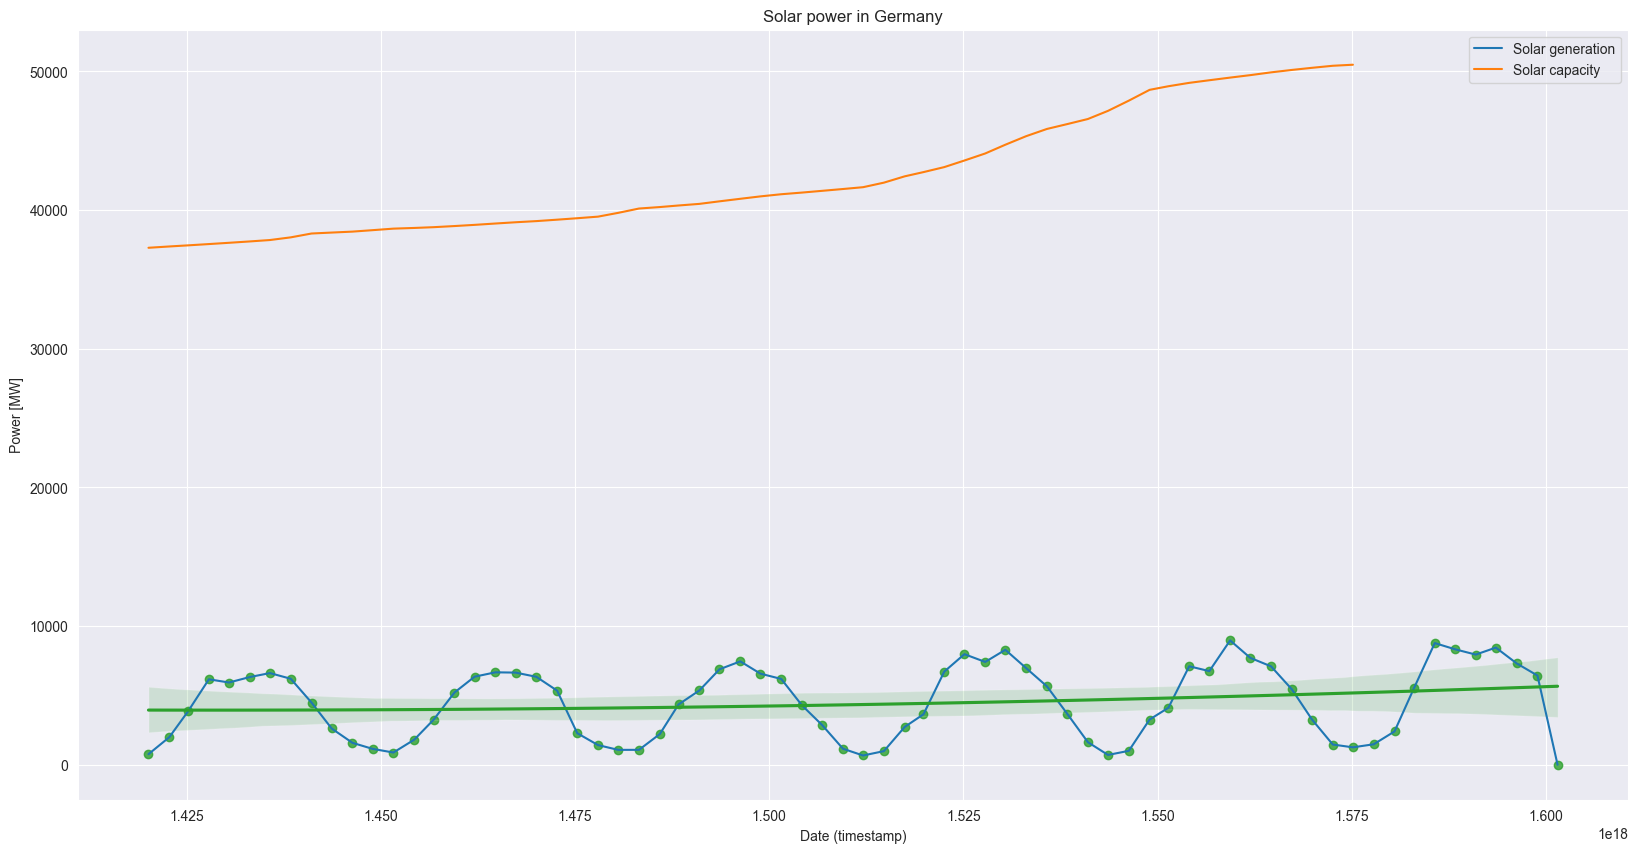

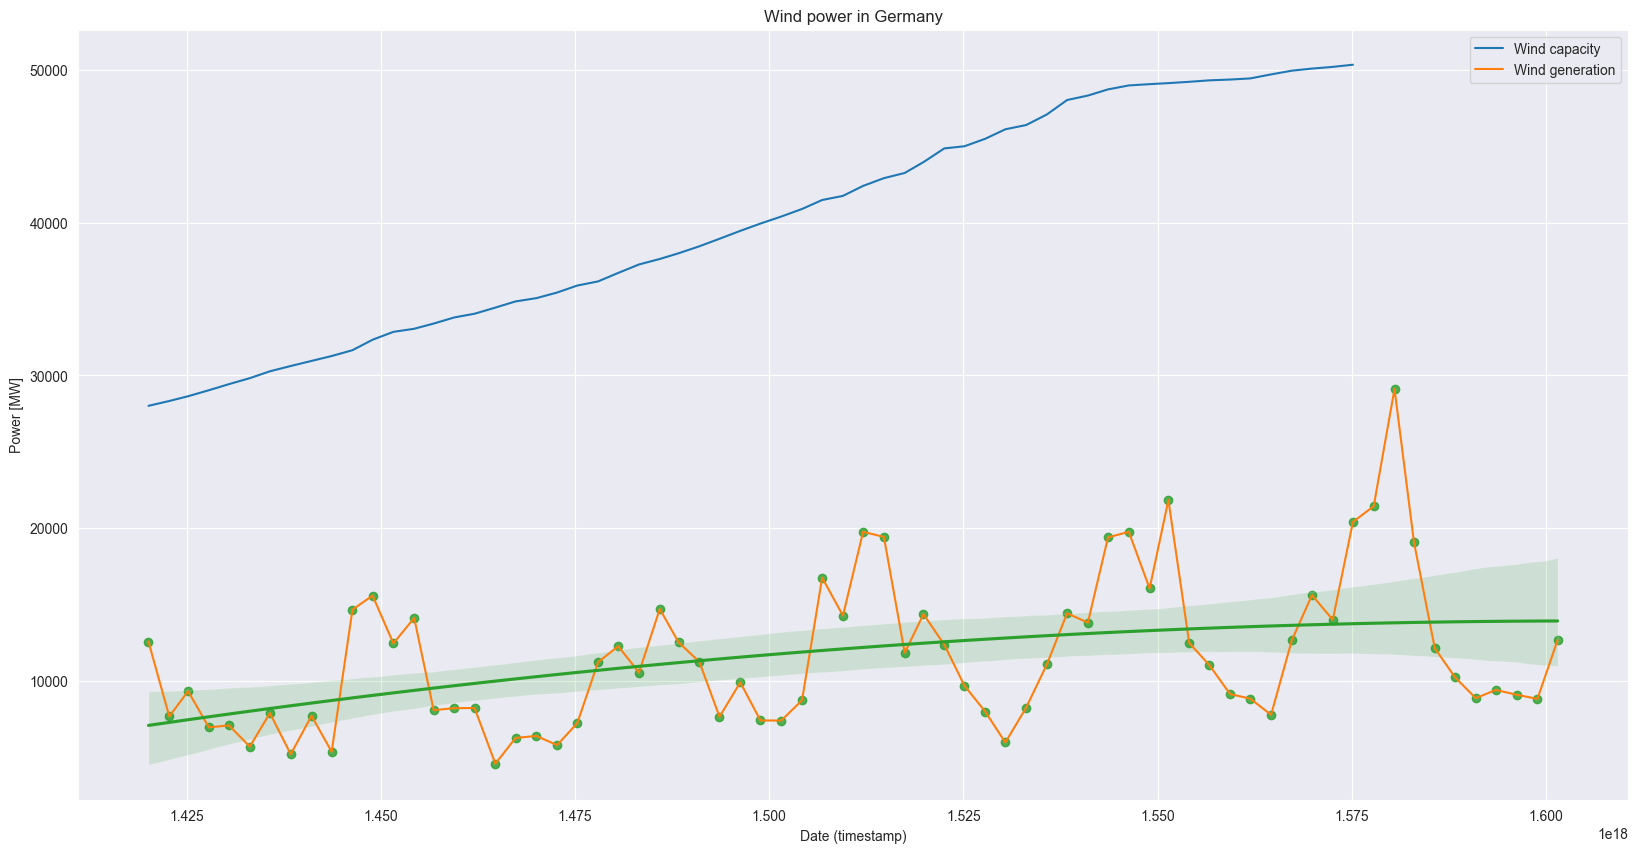

In [27]:
intra_power_df = pd.read_sql_table("power_data", DATABASE_FILE)
intra_power_df["cet_cest_timestamp"] = pd.to_datetime(intra_power_df["cet_cest_timestamp"])

# Only keep the year and month of the timestamp
intra_power_df["cet_cest_timestamp"] = intra_power_df["cet_cest_timestamp"].dt.to_period("M")

# Group the data by month and aggregate the mean value per month for wind and solar
intra_power_df = intra_power_df.groupby("cet_cest_timestamp").mean().reset_index()

# Convert the "cet_cest_timestamp" to a numeric value for regression analysis
intra_power_df["cet_cest_timestamp"] = intra_power_df["cet_cest_timestamp"].dt.to_timestamp().astype("int64")

# Plot the solar generation and capacity
plt.figure(figsize=(20, 10))
plt.plot(intra_power_df["cet_cest_timestamp"], intra_power_df["DE_solar_generation_actual"], label="Solar generation")
plt.plot(intra_power_df["cet_cest_timestamp"], intra_power_df["DE_solar_capacity"], label="Solar capacity")
sns.regplot(x="cet_cest_timestamp", y="DE_solar_generation_actual", data=intra_power_df, order=2)

plt.xlabel("Date (timestamp)")  # todo: convert numeric values back to dates for x-axis
plt.ylabel("Power [MW]")
plt.title("Solar power in Germany")
plt.legend()
plt.show()

# Plot the wind generation and capacity
plt.figure(figsize=(20, 10))
plt.plot(intra_power_df["cet_cest_timestamp"], intra_power_df["DE_wind_capacity"], label="Wind capacity")
plt.plot(intra_power_df["cet_cest_timestamp"], intra_power_df["DE_wind_generation_actual"], label="Wind generation")
sns.regplot(x="cet_cest_timestamp", y="DE_wind_generation_actual", data=intra_power_df, order=2)

plt.xlabel("Date (timestamp)")  # todo: convert numeric values back to dates for x-axis
plt.ylabel("Power [MW]")
plt.title("Wind power in Germany")
plt.legend()
plt.show()

Solar trend not clear, wind trend is increasing but growth has slown down the last years.

## Conclusion
blah balh blah. project very interesting and fun. important to learn about renewable energy and how it is used in germany. trend analysis can give lawmakers and businesses insights into the future of renewable energy and make more informed decisions.